# Student Performance Indicator

### Life cycle of Machine learning Project

#### Understanding the Problem Statement
-Data Collection

-Data Checks to perform

-Exploratory data analysis

-Data Pre-Processing

-Model Training

-Choose best model
### 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

** IMPORT REQUIRED LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/Users/nikhilthorat/Documents/ML_project/notebook/data/StudentsPerformance.csv")

In [6]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.shape

(1000, 8)

### 2.2 Dataset information
gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

### 3. Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

### Handling missing values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No Missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Duplicated values

In [11]:
df.duplicated().sum()

0

No Duplicated found!

### Checking no of unique values of each values

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
print("Unique categories in 'Gender' column: ",end = " ")
print(df['gender'].unique())

print("Unique categories in 'race/ethnicity ' column: ",end = " ")
print(df['race/ethnicity'].unique())

print("Unique categories in 'parental level of education' column: ",end = " ")
print(df['parental level of education'].unique())

print("Unique categories in 'lunch' column: ",end = " ")
print(df['lunch'].unique())

print("Unique categories in 'test preparation course' column: ",end = " ")
print(df['test preparation course'].unique())


Unique categories in 'Gender' column:  ['female' 'male']
Unique categories in 'race/ethnicity ' column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Unique categories in 'parental level of education' column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique categories in 'lunch' column:  ['standard' 'free/reduced']
Unique categories in 'test preparation course' column:  ['none' 'completed']


In [27]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical features :{} ".format(len(numeric_features),numeric_features))
print("we have {} categorical features :{} ".format(len(categorical_features),categorical_features))

we have 3 numerical features :['math score', 'reading score', 'writing score'] 
we have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


### Adding columns for Total Score and Average

In [30]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total_score']/3

In [31]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print("{} students has full reading score".format(reading_full))
print("{} students has full writing score".format(writing_full))
print("{} students has full maths score".format(math_full))

17 students has full reading score
14 students has full writing score
7 students has full maths score


In [36]:
reading_less = df[df['reading score'] <= 20]['average'].count()
writing_less = df[df['writing score'] <= 20]['average'].count()
math_less = df[df['math score'] <= 20]['average'].count()

print("{} students has less reading score".format(reading_less))
print("{} students has less writing score".format(writing_less))
print("{} students has less maths score".format(math_less))

1 students has less reading score
3 students has less writing score
4 students has less maths score


-Reading has best performance

### Exploring data (Visualization)

* Histogram

* Kernal Destribution Function

<Axes: xlabel='average', ylabel='Count'>

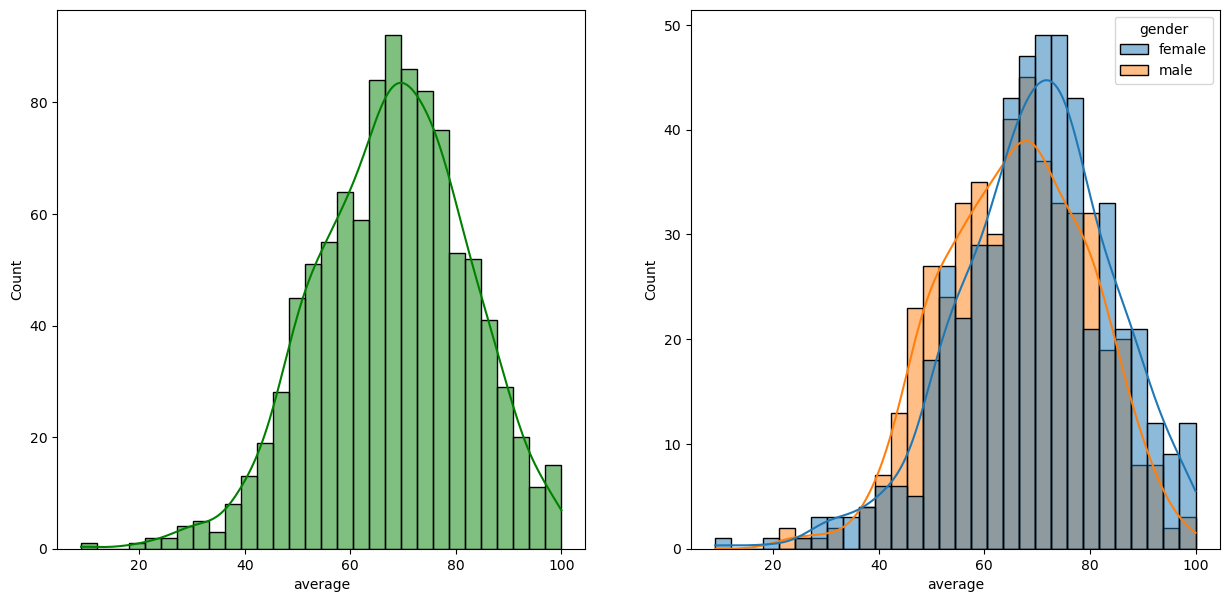

In [48]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x='average',bins =30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data = df ,x = 'average',bins =30,kde = True,color = 'b',hue = 'gender')

<Axes: xlabel='total_score', ylabel='Count'>

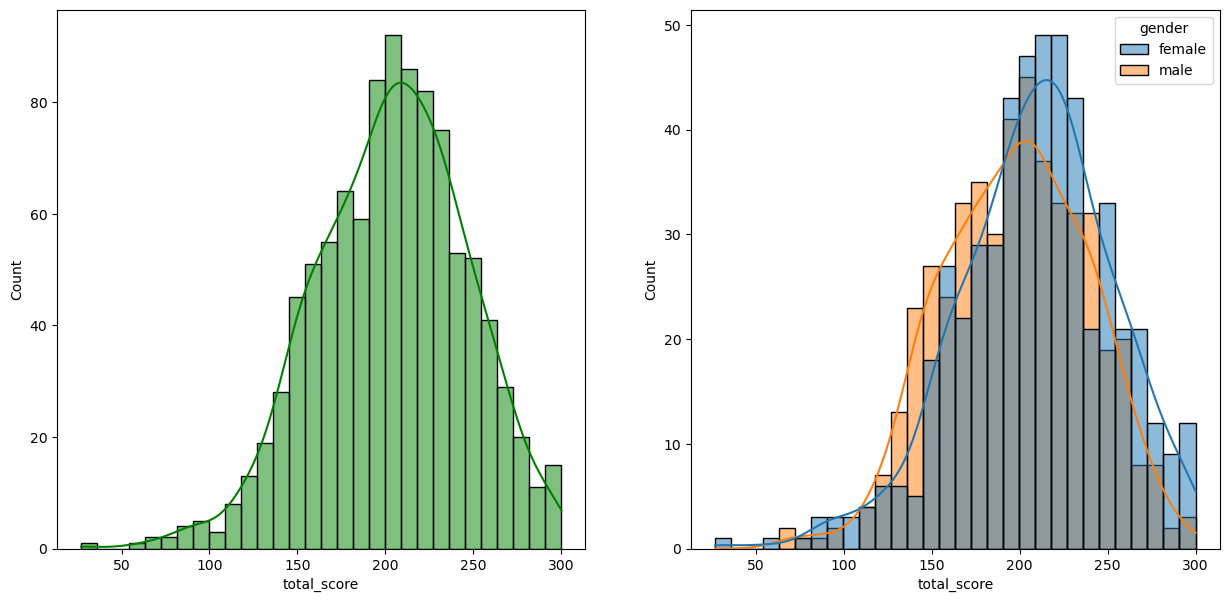

In [50]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data =df,x= 'total_score',bins = 30,kde=True,color = 'g')
plt.subplot(122)
sns.histplot(data =df,x = 'total_score',bins = 30,kde = True,color ='b',hue = 'gender')

#### Insights
* Female students tend to perform better than male students

<Axes: xlabel='average', ylabel='Count'>

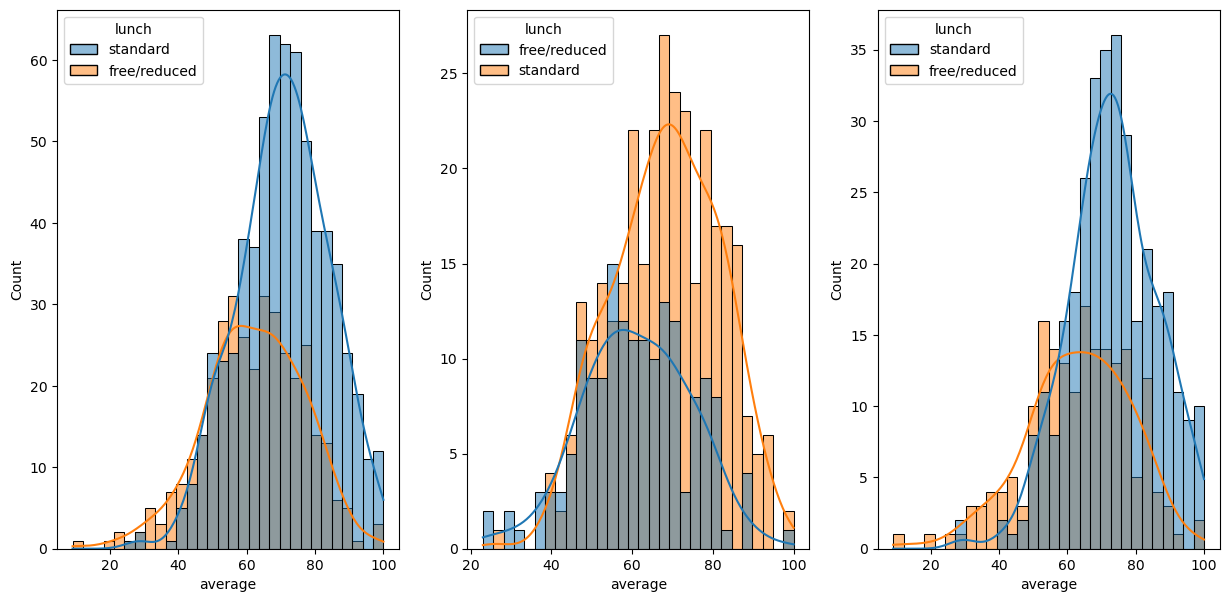

In [57]:
fig,axs = plt.subplots(1,3,figsize = (15,7))
plt.subplot(131)
sns.histplot(data =df,x ='average',kde = True,bins = 30,color = 'g',hue = 'lunch')
plt.subplot(132)
sns.histplot(data =df[df['gender']=='male'],x= 'average',kde =True,bins =30,color = 'b',hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'],x = 'average',kde = True,bins = 30,color = 'g',hue = 'lunch')

#### Insights
* Standard lunch helps students perform well in exams irrespective of gender

<Axes: xlabel='average', ylabel='Count'>

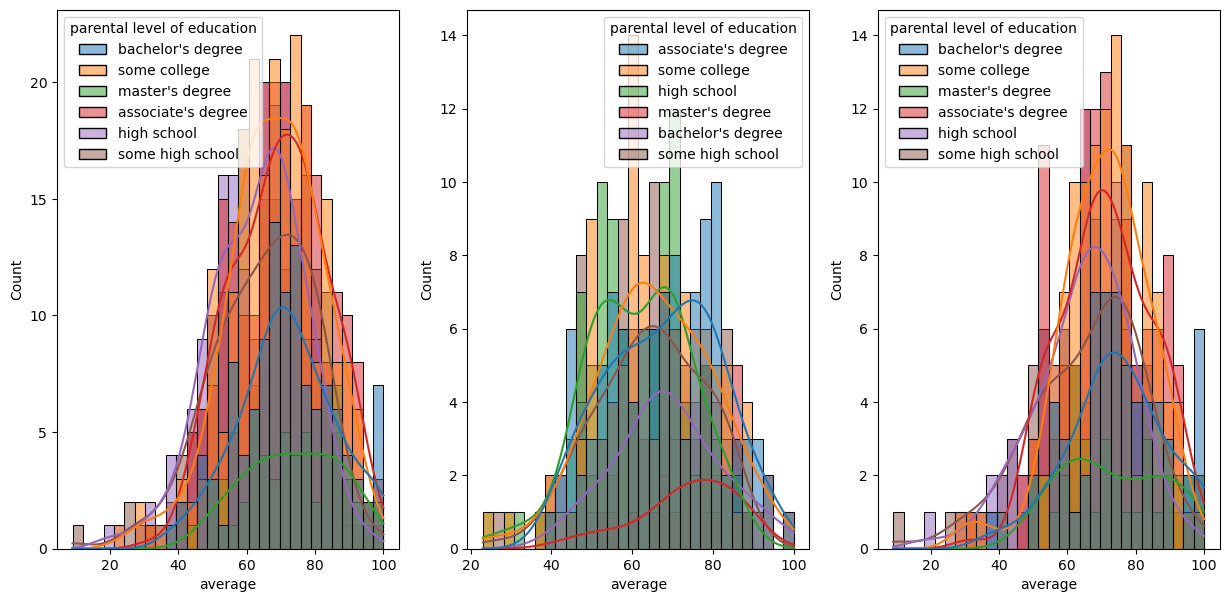

In [61]:
fig,axs = plt.subplots(1,3,figsize = (15,7))
plt.subplot(131)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,color = 'g',hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'],x = 'average',bins = 30,kde = True,color = 'g',hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'],x = 'average',bins = 30,kde = True,color = 'g',hue = 'parental level of education')


#### Insights
* In general parental education doesn't help much on student score
* 2nd graph shows that parents whose education is associate's degree or masters degree, their male child tends to perform well
* 3rd graph shows that there's no effect of parental education on female student's scores

<Axes: xlabel='average', ylabel='Count'>

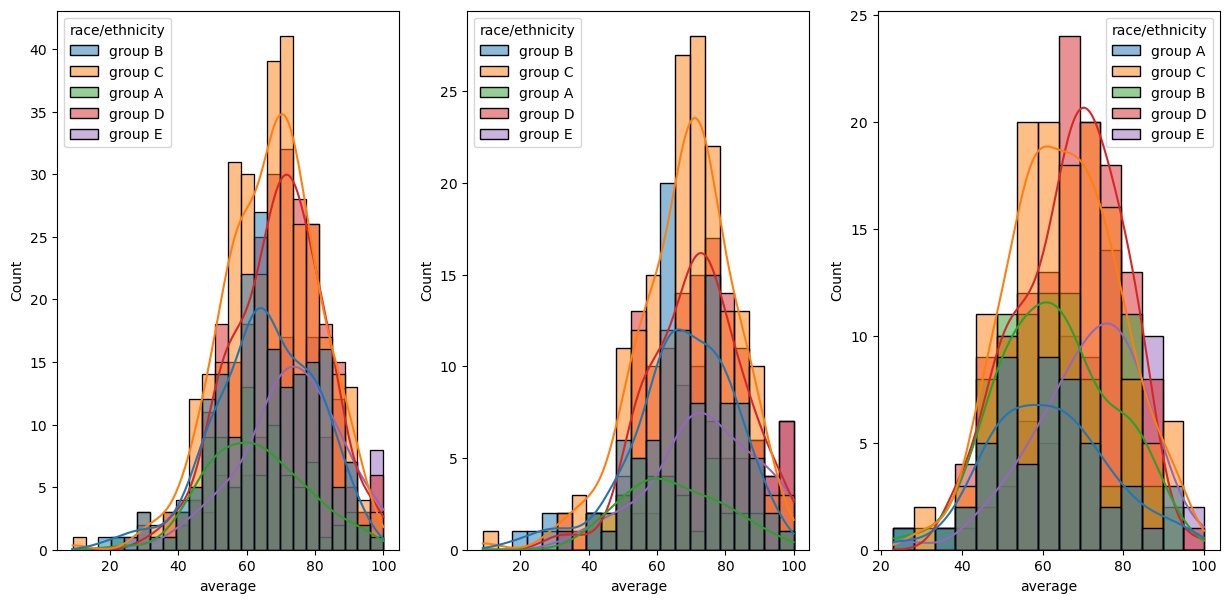

In [63]:
fig,axs = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data = df,x='average',kde = True,color = 'g',hue = 'race/ethnicity')
plt.subplot(132)
sns.histplot(data = df[df['gender']=='female'],x='average',kde = True,color = 'g',hue = 'race/ethnicity')
plt.subplot(133)
sns.histplot(data = df[df['gender']=='male'],x='average',kde = True,color = 'g',hue = 'race/ethnicity')


#### Insights
* Students of ethnic Group C tends to perform well
* Students of ethnic Group A and Group B perform poorly in exams

### Test Preparation course

### Bivariate Analysis (does Test prep course have any impact on student's performance in exam



<Axes: xlabel='lunch', ylabel='writing score'>

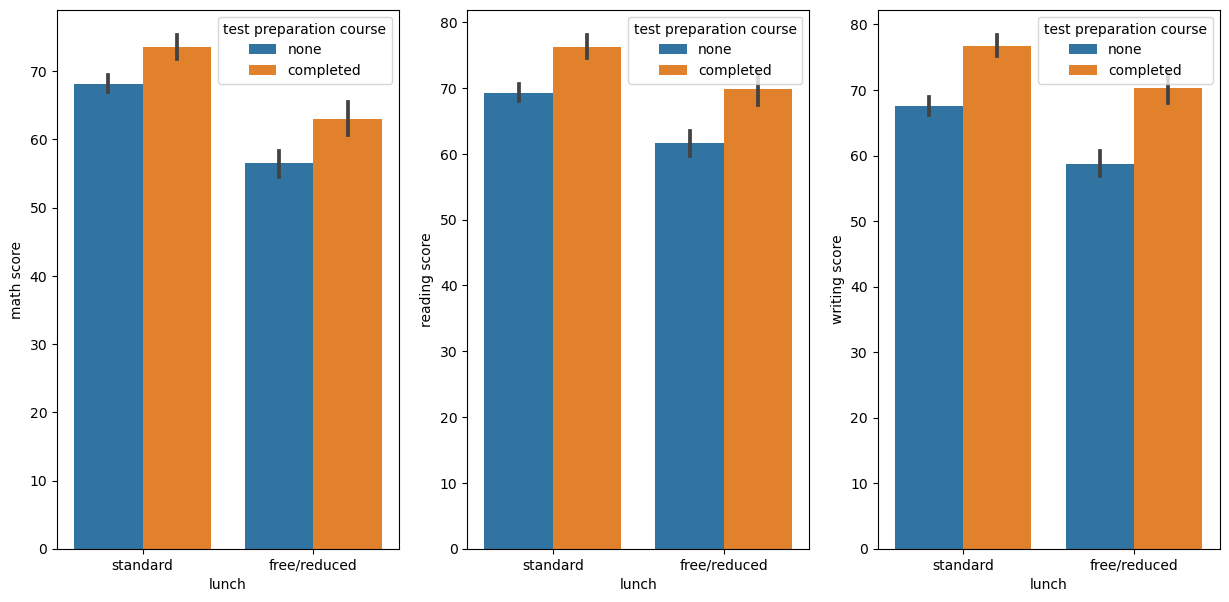

In [66]:
fig,axs = plt.subplots(1,3,figsize = (15,7))
plt.subplot(131)
sns.barplot(x= df['lunch'],y = df['math score'],hue = df['test preparation course'])

plt.subplot(132)
sns.barplot(x= df['lunch'],y = df['reading score'],hue = df['test preparation course'])

plt.subplot(133)
sns.barplot(x= df['lunch'],y = df['writing score'],hue = df['test preparation course'])

#### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Outliers

<Axes: >

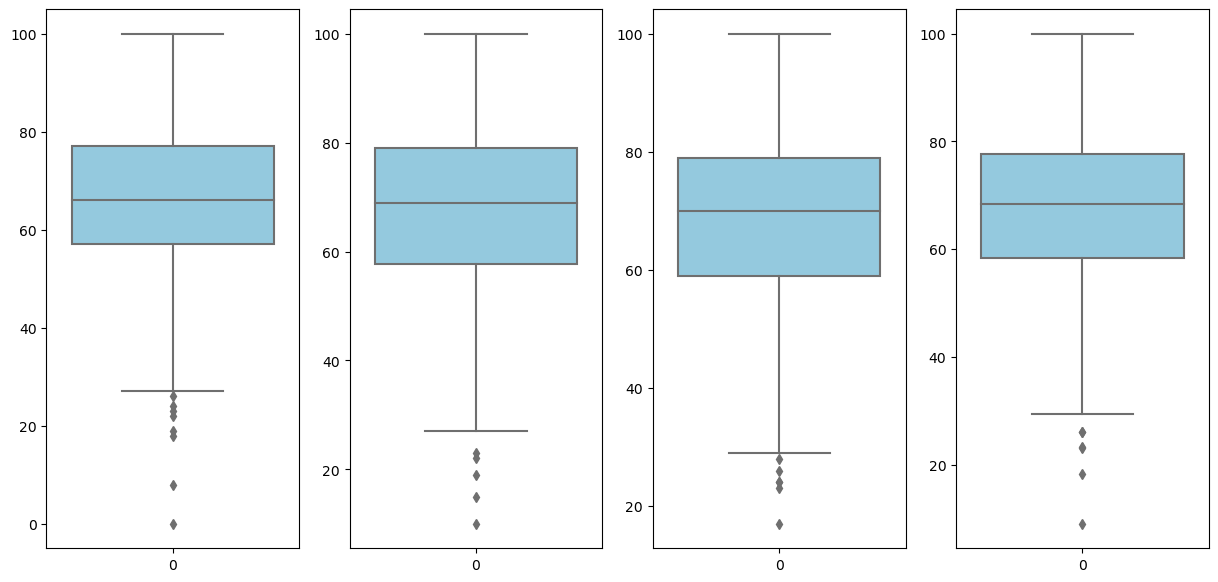

In [73]:
fig,axs = plt.subplots(1,4,figsize =(15,7))
plt.subplot(141)
sns.boxplot(df['math score'],color = 'skyblue')

plt.subplot(142)
sns.boxplot(df['writing score'],color = 'skyblue')

plt.subplot(143)
sns.boxplot(df['reading score'],color = 'skyblue')

plt.subplot(144)
sns.boxplot(df['average'],color = 'skyblue')